# Importing relavant Library and frameworks

# K_means CLustering

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA


<h3> Loading the dataset </h3>

In [2]:
df = pd.read_csv("players_22.csv")


/var/folders/16/nkxwjyjn1nn_mqn04_db4d040000gp/T/ipykernel_44947/1704323198.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("players_22.csv")


In [3]:
df.shape

(19239, 110)

In [4]:
df.head() 

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]#Choose the features to work with, 5 features
df[features].isnull().sum()#checking for null values

overall       0
potential     0
wage_eur     61
value_eur    74
age           0
dtype: int64

In [6]:
df = df.dropna(subset=features)#drop null values from subset feature's attribute and assign 
# with the selected features only in the 'df' data frame
df[features].isnull().sum()

overall      0
potential    0
wage_eur     0
value_eur    0
age          0
dtype: int64

<h3>Aim is to make strongly co-related data points in the given number of clusters </h3>

In [7]:
data = df[features].copy()#make a dataframe copy with the features for future use
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


 <h3> Scale all data points between 1-11</h3>

In [8]:
scaler = MinMaxScaler(feature_range=(1, 10))
data_scaled = scaler.fit_transform(data)#use minmax scaler to scale between 1-10 of all the features values 
data_scaled
data = pd.DataFrame(data_scaled,columns=features)#convert scaled data(arry) to dataframe
data.describe() # to see some statistical values of the dataset

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
#Checking some output type 
print(data[features]) # data frame #print(data) same
print(data_scaled) # numpy array
print(type(data_scaled))


# Apply k-means clustering


In [9]:

k = 8  # Number of clusters we want 
km = KMeans(n_clusters=k, random_state=42)
y_labels = km.fit_predict(data)#Here each player or datapoint will be assigned to a cluster out of given k=5 clusters
y_labels


array([4, 4, 4, ..., 7, 7, 7], dtype=int32)

<h3> checking the centroids</h3>
k-means aims to find k centroids that minimize  within-cluster sum of squared distances.For each data point in a cluster, the distance between the data point and its centroid is calculated, squared, and then summed up for all data points within the cluster

In [10]:
centroids =km.cluster_centers_ #checking the centroids for each cluster with given features
print(centroids) # here centroids are for the k=5

[[3.82710949 3.68556996 1.03652752 1.01913498 4.84148636]
 [4.8075956  5.1231011  1.10467794 1.05862848 3.99776885]
 [5.92983672 6.87358079 1.42259647 1.28950789 3.27743814]
 [3.96866548 6.01136225 1.04999041 1.048412   2.34729603]
 [7.88548137 7.89208075 3.3978132  2.76195251 4.70568783]
 [4.85948641 4.47244411 1.0868244  1.02949413 6.4081381 ]
 [6.26566048 5.91847134 1.48689538 1.19318146 5.73007785]
 [2.61143566 4.44690586 1.01702704 1.01356287 2.44867222]]


In [11]:
data['Cluster']= y_labels # add new coloumn as 'Cluster' to the dataset and map 'y_labels' to each player
data # Now all the players belong to one of the cluster 

,overall,potential,wage_eur,value_eur,age,Cluster
0,10.000000,9.608696,9.227468,4.618307,7.000000,4
1,9.804348,9.413043,7.939914,6.543654,6.333333,4
2,9.608696,9.217391,7.939914,3.087308,7.666667,4
3,9.608696,9.217391,7.939914,6.984396,5.333333,4
4,9.608696,9.217391,10.000000,6.822018,5.666667,4
...,...,...,...,...,...,...
19160,1.000000,1.586957,1.012876,1.002830,3.000000,7
19161,1.000000,2.956522,1.000000,1.004686,2.000000,7
19162,1.000000,2.173913,1.000000,1.004222,2.666667,7
19163,1.000000,3.152174,1.000000,1.004686,2.000000,7


In [12]:
data['Cluster'].value_counts()# to see how many total players assigned to each cluster

1    3739
3    3202
7    2523
5    2433
6    2354
2    2284
0    2126
4     504
Name: Cluster, dtype: int64

<h3> Using PCA Method plot the graph </h3>

PCA(Principal Component Analysis) is used for dimensionality reduction. 
PCA is a technique used to transform high-dimensional data into a lower-dimensional space

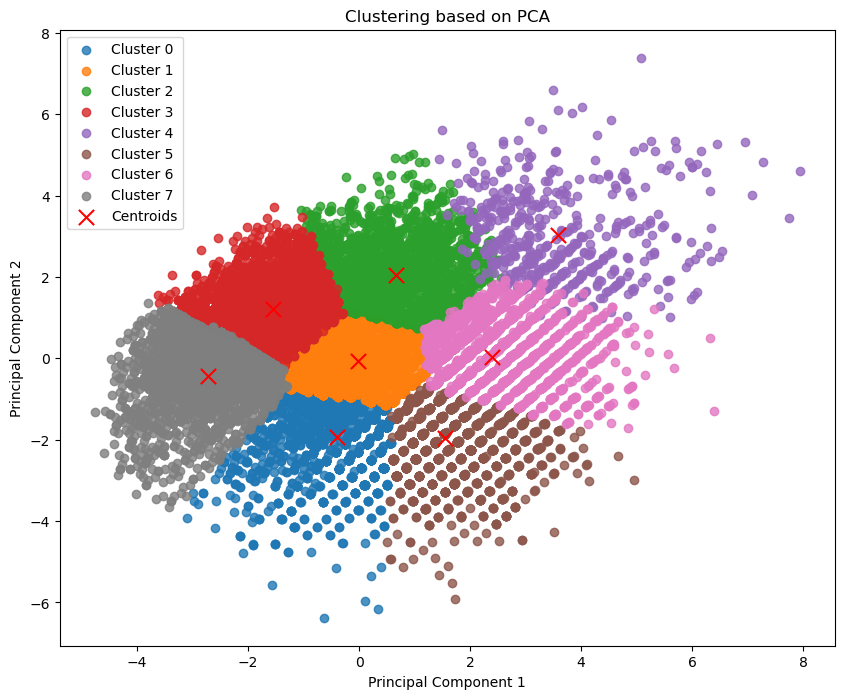

In [13]:
# Plot scatter plot with all features

pca = PCA(n_components=2) # number of dimensions choosen
data_pca = pca.fit_transform(data_scaled) # fit the data to pca method to reduce dimensions 
centroid_pca = pca.transform(km.cluster_centers_) # adjusting the centroids accordingly 

plt.figure(figsize=(10, 8))
for cluster_label in range(k): # calculating for differnt number of k values (1-5 here)
    cluster_data = data_pca[y_labels == cluster_label] #filters the data points based on their assigned cluster labels
    # checking for each data points cluster_label whether it matched with the current cluster_label in the loop
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}', alpha=0.8)

# Plot centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], marker='x', s=120, color='red', label='Centroids')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering based on PCA")
plt.legend()
plt.show()


# Using Train_Test_Split

In [14]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
#print(train_data[features])
# Apply k-means clustering on the training data
#k = 7
km2 = KMeans(n_clusters=k, random_state=42)
y_labels_train = km2.fit_predict(train_data[features])# excluding 'cluster' coloumn
# Assign clusters to the test data
y_labels_test = km2.predict(test_data[features])


Train Silhouette Score: 0.3032525050064463
Test Silhouette Score: 0.30057550163767854


/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


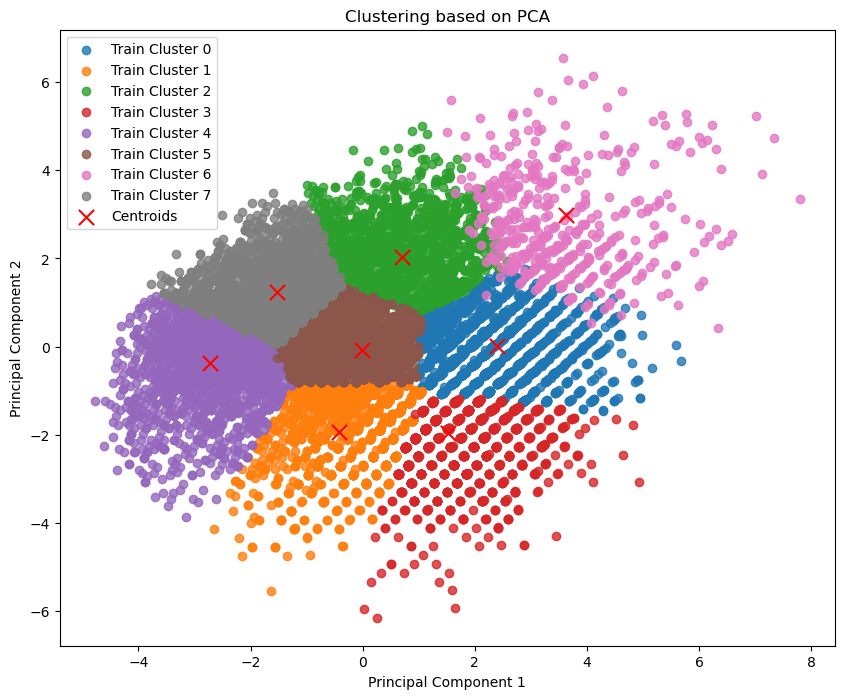

In [15]:
from sklearn.metrics import silhouette_score
# Evaluation - Silhouette Score
train_silhouette_score = silhouette_score(train_data[features], y_labels_train)
test_silhouette_score = silhouette_score(test_data[features], y_labels_test)

print("Train Silhouette Score:", train_silhouette_score)
print("Test Silhouette Score:", test_silhouette_score)

# Plotting - PCA visualization
pca = PCA(n_components=2)
train_data_pca = pca.fit_transform(train_data[features])
test_data_pca = pca.transform(test_data[features])
centroid_pca = pca.transform(km.cluster_centers_)

plt.figure(figsize=(10, 8))

# Plotting training data clusters
for cluster_label in range(k):
    cluster_data = train_data_pca[y_labels_train == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Train Cluster {cluster_label}', alpha=0.8)


# Plotting centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], marker='x', s=120, color='red', label='Centroids')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering based on PCA")
plt.legend()
plt.show()


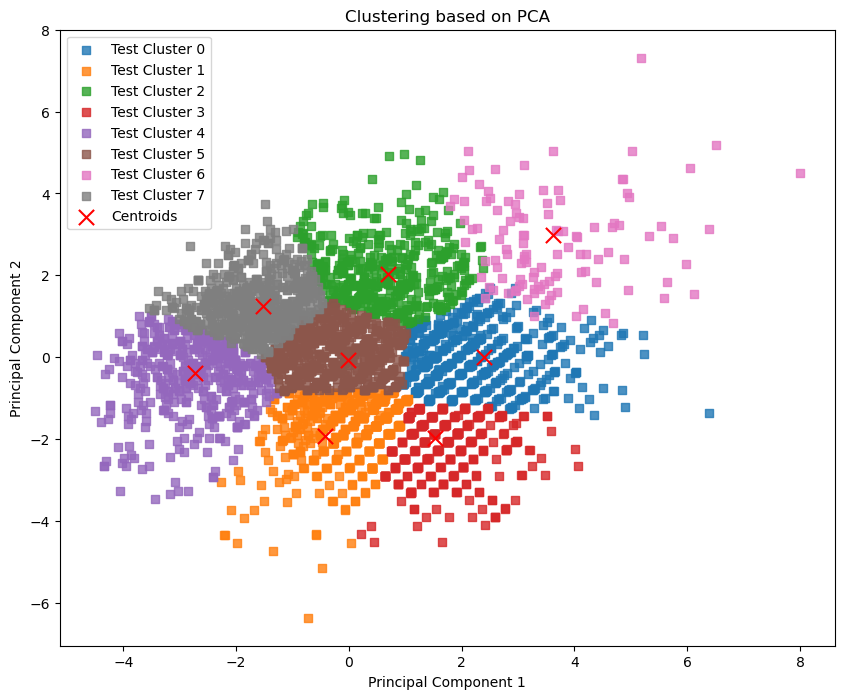

In [16]:
plt.figure(figsize=(10, 8))
# Plotting test data clusters
for cluster_label in range(k):
    cluster_data = test_data_pca[y_labels_test == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Test Cluster {cluster_label}', alpha=0.8, marker='s')

# Plotting centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], marker='x', s=120, color='red', label='Centroids')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering based on PCA")
plt.legend()
plt.show()


<h3> Elbow method to find the optimal value of k </h3>

In [18]:
sse = [] # calculate the Sum of Squared Errors (SSE) for different values of k in the range
k_rng = range(1, 20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data_scaled)
    sse.append(km.inertia_) #he inertia represents the SSE for the current k value.


In [19]:
sse # SSE reduced on every iteration of k

[116740.50254970649,
 74272.86687539982,
 51663.890527080315,
 41921.18422359128,
 35181.14359906581,
 30520.270667172445,
 26527.07457930498,
 23852.31700978514,
 21642.910997462706,
 19728.862268712404,
 18275.100415571946,
 16981.116553852306,
 15825.362560261034,
 14860.563850078323,
 14070.13951281385,
 13377.529963836652,
 12714.181514056154,
 12117.31017156148,
 11577.644153050878]

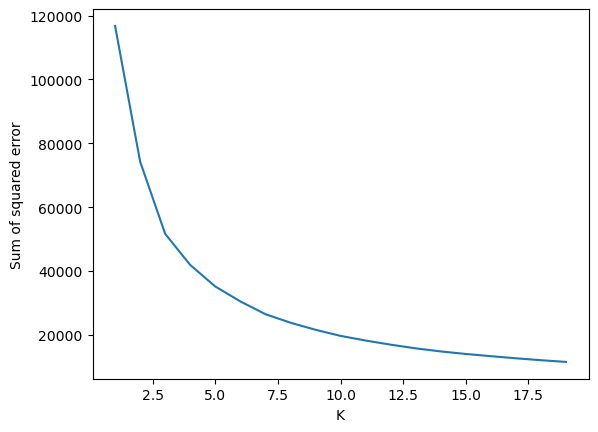

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
"""

Real world usecase:
Customer Segmentation: 
Businesses can use k-means clustering to segment their customer base into distinct groups based on 
their purchasing behavior, demographics, or other relevant features. This helps businesses understand 
their customers better and tailor their marketing strategies to specific customer segments.

Genetic Clustering: 
In genetics, k-means clustering can be applied to analyze gene data and identify distinct groups of genes 
that exhibit similar patterns. This can help in understanding gene functions, 
identifying disease subtypes, or discovering biomarkers.

"""

"""
k-means algorithm is an unsupervised learning algorithm used for clustering, 
which means it does not rely on labeled data for training and does not make predictions unlike KNN-model.
In k-means there are no use for train-test data. It may result in 

But we can still use train-test data for k-means model. Different splits can provide insights into the stability 
and generalizability of the clustering solution
"""


